# Example for Geo-Multilayer Network

GeoMultiGraph is a model for multilayer graph with geo-reference for each node. Some analysis tools and plot interface have been provided so far and there can be more functions in the future.

The data here is in 'pywebplot/src/data/GeoMultiGraph.npy' which is an OD taxi trajectory in Beijing for six years and the region segement data can be found in 'pywebplot/src/data/taz.geojson'. That create a multilayer graph with 1371 nodes and 6 layers.

In [2]:
import sys
sys.path.append("..")
from pywebplot import *
from GeoMultiGraph import GeoMultiGraph
from palettable.colorbrewer.qualitative import Set3_12
from IPython.display import HTML
gmg = GeoMultiGraph()
gmg.load('../src/data/GeoMultiGraph_week', generate_nx=True, network_list=['2012', '2013', '2014', '2015', '2016', '2017'])

Generating Network 2012
Generating Network 2013
Generating Network 2014
Generating Network 2015
Generating Network 2016
Generating Network 2017


The distribution of weight on edges can be displayed by dist-plot, qq-plot, cdf and ccdf.

In general, the distribution subordinates to power law distribution for a reality dataset, which can be seen in the following figures.

Generating Edges Data Frame...
Finished.


/Users/zz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


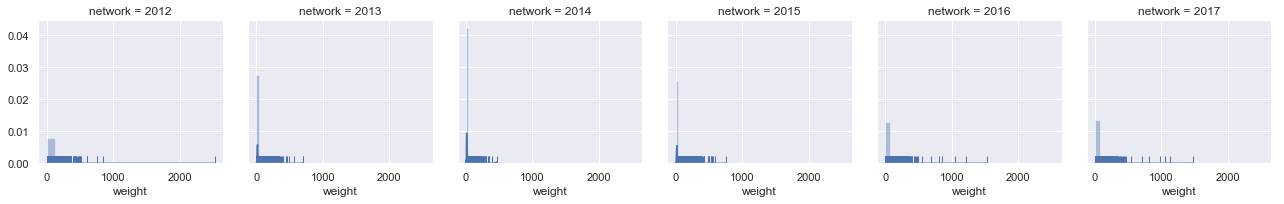

In [5]:
gmg.draw_dist(hist=True, kde=True, bins=20)

Generating Edges Data Frame...
Finished.


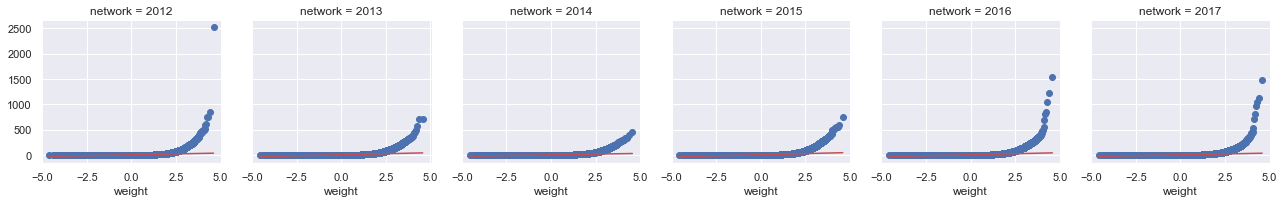

In [6]:
gmg.draw_qq_plot()

Generating Edges Data Frame...
Finished.


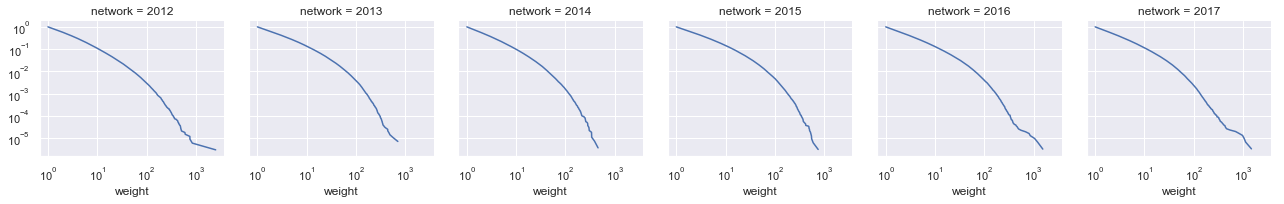

In [7]:
gmg.draw_ccdf()

Generating Edges Data Frame...
Finished.


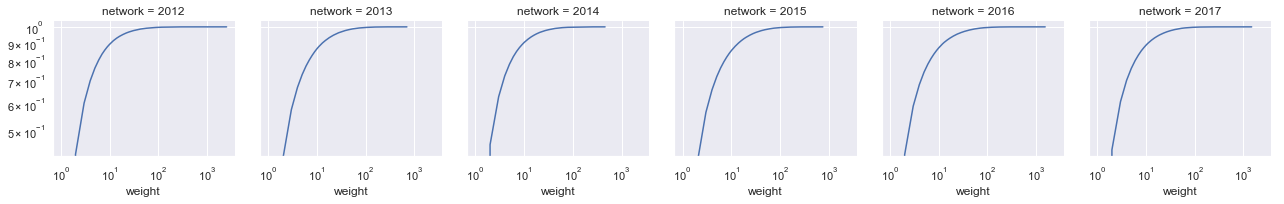

In [8]:
gmg.draw_cdf()

If the data does not meet expectations or needs to be adjusted, you can use 'threshold' and 'transform' to fix it.

Generating Network 2012
Generating Network 2013
Generating Network 2014
Generating Network 2015
Generating Network 2016
Generating Network 2017
Generating Edges Data Frame...
Finished.


/Users/zz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


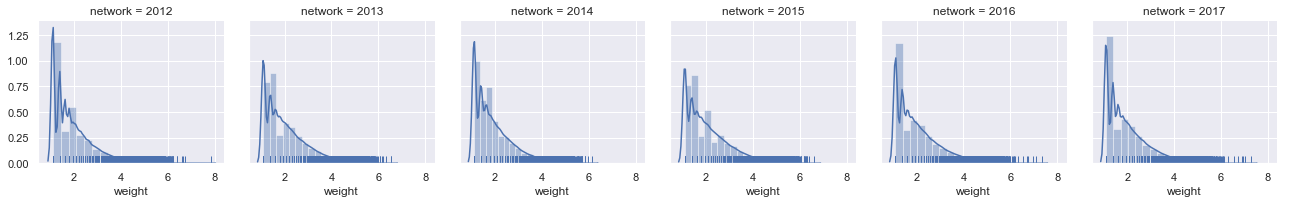

In [9]:
gmg.threshold(t_min=3, generate_nx=False)
gmg.transform(func='log', generate_nx=True)
gmg.draw_dist(hist=True, kde=True, bins=20)

The basic distribution can be displayed by network visualization and some low-weight trajectories are removed to ensure image clarity.

In [ ]:
gmg.threshold(t_min=3, generate_nx=True)
gmg.draw_network(color='white', width=1., value='weight', bk=True, inline=False, row=3, column=2)

The hotspot of the city can be displyed by calculate the centrality(for example, closeness centrality), degree or cluster coefficient. And they can be easily plotted on map.

In [ ]:
closeness_centrality = gmg.closeness_centrality
in_degree = gmg.in_degree
out_degree = gmg.out_degree
cluster_coefficient = gmg.cluster_coefficient
plt = PlotView(column_num=2, row_num=2, title='Statistics-Information')
plt[0, 0].name = 'Closeness-Centrality'
plt[1, 0].name = 'In-Degree'
plt[1, 1].name = 'Out-Degree'
plt[0, 1].name = 'Cluster-Coefficient'
maps = [MapBox(name='map-si-%i' % i,
                  pk='pk.eyJ1IjoiaGlkZWlubWUiLCJhIjoiY2o4MXB3eWpvNnEzZzJ3cnI4Z3hzZjFzdSJ9.FIWmaUbuuwT2Jl3OcBx1aQ',
                  lon=116.37363,
                  lat=39.915606,
                  style='mapbox://styles/hideinme/cjtgp37qv0kjj1fup07b9lf87',
                  pitch=55,
                  bearing=0,
                  zoom=12,
                  viewport=plt[i]) for i in range(4)]
gmg.draw_choropleth_map(map_view=maps[0], data=closeness_centrality[0], value='closeness_centrality', title='closeness_centrality')
gmg.draw_choropleth_map(map_view=maps[1], data=in_degree[0], value='in_degree', title='in_degree')
gmg.draw_choropleth_map(map_view=maps[2], data=out_degree[0], value='out_degree', title='out_degree')
gmg.draw_choropleth_map(map_view=maps[3], data=cluster_coefficient[0], value='cluster_coefficient', title='cluster_coefficient')
plt.plot(inline=True)

Closeness Centrality for 2012...


Community discovery algorithms can be used to hierarchically cluster sub-regions to show the structural characteristics of the city (the multi-layer network discovery algorithm based on infomap will be joined soon.)

In [2]:
cl = gmg.community_detection_louvain(min_size=20, resolution=1.)
gmg.draw_multi_scale_community(community=cl, cmap=Set3_12, inline=True)

Louvain for network 2012...
Network 2012 Modularity: 0.352882.
Finished 2012, 4 communities found, 38 point unclassified.
Louvain for network 2013...
Network 2013 Modularity: 0.371570.
Finished 2013, 7 communities found, 37 point unclassified.
Louvain for network 2014...
Network 2014 Modularity: 0.379705.
Finished 2014, 5 communities found, 34 point unclassified.
Louvain for network 2015...
Network 2015 Modularity: 0.395109.
Finished 2015, 7 communities found, 20 point unclassified.
Louvain for network 2016...
Network 2016 Modularity: 0.411963.
Finished 2016, 8 communities found, 10 point unclassified.
Louvain for network 2017...
Network 2017 Modularity: 0.393311.
Finished 2017, 7 communities found, 14 point unclassified.
Starting server, listen at: http://localhost:4396
Geo-Multi-Graph: http://localhost:4396/geo-multi-graph.html


127.0.0.1 - - [14/Apr/2019 17:32:02] "GET /geo-multi-graph.html HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:32:02] "GET /index.css HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:32:02] "GET /map_0.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:32:02] "GET /map_1.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:32:02] "GET /map_2.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:32:02] "GET /map_3.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:32:02] "GET /map_4.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:32:02] "GET /map_5.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:32:07] "GET /2012community.geojson HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:32:08] "GET /2013community.geojson HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:32:08] "GET /2015community.geojson HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:32:08] "GET /2014community.geojson HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:32:09] "GET /2016community.geojson HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:32:09] c

In [3]:
HTML('<iframe src="http://localhost:4396/geo-multi-graph.html", width=1000, height=600></iframe>')

127.0.0.1 - - [14/Apr/2019 17:34:59] "GET /geo-multi-graph.html HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:34:59] "GET /index.css HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:34:59] "GET /map_0.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:34:59] "GET /map_1.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:34:59] "GET /map_2.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:34:59] "GET /map_3.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:34:59] "GET /map_4.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:34:59] "GET /map_5.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:35:02] "GET /2012community.geojson HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:35:03] "GET /2016community.geojson HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:35:03] "GET /2013community.geojson HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:35:03] "GET /2014community.geojson HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:35:04] "GET /2017community.geojson HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2019 17:35:04] "